In [ ]:
import numpy as np
import matplotlib as mpl

# make sure outputs are reproducible
np.random.seed(42)


mpl.rcParams.update({
    "text.usetex": False,             # kein LaTeX nötig
    "font.family": "serif",
    "font.serif": ["cmr10"],  # exakt der Name aus Schritt 1
})
# -----------------------------
# Figure & text defaults
# -----------------------------
FIGURE_SIZE = (15, 8)
TITLE_FONT_SIZE = 20
AXIS_LABEL_FONT_SIZE = 16
AXIS_TICKS_FONT_SIZE = 16
LEGEND_FONT_SIZE = 16
LEGEND_LOC = "upper left"

# -----------------------------
# Colormap / colors (tab10)
# -----------------------------
TAB10 = mpl.cm.get_cmap("tab10")
COLOR_CYCLE = [TAB10(i) for i in range(10)]

# Linienfarben (erste/zweite/… Serie)
LINE1_COLOR = COLOR_CYCLE[0]  # tab10[0] (blau)
LINE2_COLOR = COLOR_CYCLE[1]  # tab10[1] (orange)
LINE3_COLOR = COLOR_CYCLE[2]  # tab10[2] (grün)
# Optional: gesamte Reihenfolge, falls du automatisch cyclen willst
LINE_COLOR_CYCLE = COLOR_CYCLE

# -----------------------------
# Line & point style (für Datenserien)
# -----------------------------
LINE_WIDTH = 2.0
LINE_STYLE = "-"           # durchgezogene Linie
LINE_SHOW_POINTS = True    # Punkte auf den Linien anzeigen?
LINE_POINT_MARKER = "o"    # Marker für Datenpunkte (auf der Linie)
LINE_POINT_SIZE = 36       # Punktfläche in pt^2
LINE_POINT_EDGE_WIDTH = 0.8
LINE_POINT_EDGE_COLOR = "black"

# -----------------------------
# Grid / axes
# -----------------------------
GRID_ENABLED = True
GRID_LINE_WIDTH = 0.8
GRID_ALPHA = 0.3
USE_LOG_X = True           # x-Achse logarithmisch?
X_TICK_PAD = 12            # Abstand der x-Ticklabels zur Achse

# -----------------------------
# X-Achsen-Marker (Kreise auf der Achse)
# -----------------------------
# Wunsch: "einfach die Farbe rot (tab10 nehmen)" -> tab10[3] ist rot
XMARKER_COLOR = COLOR_CYCLE[3]      # rot aus tab10
XMARKER_SIZE = 60                   # Markerfläche in pt^2 (kleiner machen = kleineren Wert wählen)
XMARKER_EDGE_COLOR = "black"
XMARKER_EDGE_WIDTH = 1.0
XMARKER_LEGEND_LABEL = "Marked x-points"  # Text für Legende der Achsenmarker

# -----------------------------
# Saving defaults (falls du NotebookFigureSaver nutzt)
# -----------------------------
FIG_EXTENSION = "png"
FIG_DPI = 600
TIGHT_LAYOUT_DEFAULT = True


/var/folders/n7/s4z9fwds1bxg4xwvfjw97xfw0000gn/T/ipykernel_65725/226192994.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  TAB10 = mpl.cm.get_cmap("tab10")


In [121]:
from typing import Iterable, Optional, Sequence, Union, Mapping
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import blended_transform_factory as _blended

Number = Union[int, float]

def plot_series_with_markers(
    ys: Union[Sequence[Sequence[Number]], Mapping[str, Sequence[Number]]],
    x: Optional[Sequence[Number]] = None,
    *,
    series_labels: Optional[Sequence[str]] = None,
    x_markers: Optional[Iterable[Number]] = None,
    x_marker_labels: Optional[Iterable[Union[str, int, float]]] = None,
    markers_legend_label: str = XMARKER_LEGEND_LABEL,  # <-- aus Constants
    title: Optional[str] = None,
    xlabel: str = "x",
    ylabel: str = "y",
    show_points_on_lines: bool = LINE_SHOW_POINTS,      # <-- aus Constants
    grid: bool = GRID_ENABLED,                          # <-- aus Constants
    saver: Optional["NotebookFigureSaver"] = None,
    fig_id: Optional[str] = None,
    tight_layout: bool = TIGHT_LAYOUT_DEFAULT,          # <-- aus Constants
):
    """
    Plot multiple y-series against a shared x, add points on the x-axis (optional log-x),
    and show a legend for both series and the x-axis points. All styling via constants.
    """
    # --- Labels & Daten normalisieren ---
    if isinstance(ys, Mapping):
        labels = list(ys.keys())
        y_list = [ys[k] for k in labels]
    else:
        y_list = list(ys)
        labels = list(series_labels) if series_labels is not None else [f"series {i+1}" for i in range(len(y_list))]

    if x is None:
        max_len = max(len(y) for y in y_list)
        x = list(range(max_len))

    # --- Figure / Axes mit vordefiniertem Color-Cycle ---
    fig = plt.figure(figsize=FIGURE_SIZE)
    ax = fig.add_subplot(111)
    if "LINE_COLOR_CYCLE" in globals() and LINE_COLOR_CYCLE:
        ax.set_prop_cycle(color=LINE_COLOR_CYCLE)

    # --- Serien zeichnen ---
    for y, lab in zip(y_list, labels):
        # ggf. auf x interpolieren
        if len(y) != len(x):
            xi = np.linspace(0, len(y)-1, num=len(x))
            yi = np.interp(xi, np.arange(len(y)), np.asarray(y, dtype=float))
            y_to_plot = yi
        else:
            y_to_plot = y

        marker_style = LINE_POINT_MARKER if show_points_on_lines else None
        # plot() erwartet markersize in *pt*, während scatter s in pt^2 ist -> Wurzel für gutes Matching
        ms = (LINE_POINT_SIZE ** 0.5) if show_points_on_lines else None

        ax.plot(
            x, y_to_plot,
            LINE_STYLE,
            label=lab,
            linewidth=LINE_WIDTH,
            marker=marker_style,
            markersize=ms if ms is not None else None,
            markeredgewidth=LINE_POINT_EDGE_WIDTH if show_points_on_lines else None,
            markeredgecolor=LINE_POINT_EDGE_COLOR if show_points_on_lines else None,
        )

    # --- Titel & Achsen ---
    if title:
        ax.set_title(title, fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(xlabel, fontsize=AXIS_LABEL_FONT_SIZE)
    ax.set_ylabel(ylabel, fontsize=AXIS_LABEL_FONT_SIZE)
    ax.tick_params(axis="both", labelsize=AXIS_TICKS_FONT_SIZE)

    # Grid
    if grid:
        ax.grid(True, which="both", linewidth=GRID_LINE_WIDTH, alpha=GRID_ALPHA)

    # Log-x (falls aktiviert)
    if USE_LOG_X:
        ax.set_xscale("log")
    ax.tick_params(axis="x", pad=X_TICK_PAD)

    # --- Punkte auf der x-Achse (genau auf der Achsenlinie, einheitliche tab10-rot) ---
    if x_markers:
        x_marks = [float(xm) for xm in x_markers if xm is not None and xm > 0]
        trans = _blended(ax.transData, ax.transAxes)  # x in Daten, y in Achsen
        y_on_axis = 0.0

        for i, xm in enumerate(x_marks):
            # Label-Text vorbereiten (falls du später wieder Labels im Kreis willst)
            _ = (
                str(list(x_marker_labels)[i])
                if x_marker_labels is not None and i < len(list(x_marker_labels))
                else str(int(xm) if float(xm).is_integer() else xm)
            )

            ax.scatter(
                [xm], [y_on_axis],
                s=XMARKER_SIZE,
                facecolor=XMARKER_COLOR,
                edgecolor=XMARKER_EDGE_COLOR,
                linewidth=XMARKER_EDGE_WIDTH,
                zorder=6, transform=trans, clip_on=False
            )
            # Falls du die Zahl wieder IM Marker sehen willst, diesen Block aktivieren:
            # ax.text(
            #     xm, y_on_axis, _,
            #     ha="center", va="center",
            #     fontsize=AXIS_TICKS_FONT_SIZE * 0.9,
            #     color="white", fontweight="bold",
            #     zorder=7, transform=trans, clip_on=False
            # )

        # Legendeneintrag für Marker
        proxy = Line2D([0], [0], marker="o", linestyle="None",
                       markerfacecolor=XMARKER_COLOR, markeredgecolor=XMARKER_EDGE_COLOR,
                       markeredgewidth=XMARKER_EDGE_WIDTH, markersize=(XMARKER_SIZE ** 0.5))
        handles, line_labels = ax.get_legend_handles_labels()
        handles.append(proxy)
        line_labels.append(markers_legend_label)
        leg = ax.legend(handles, line_labels, fontsize=LEGEND_FONT_SIZE, loc=LEGEND_LOC)
        leg.set_frame_on(False)
    else:
        leg = ax.legend(fontsize=LEGEND_FONT_SIZE, loc=LEGEND_LOC)
        if leg:
            #leg.set_frame_on(True)
            leg = ax.legend(handles, line_labels, fontsize=LEGEND_FONT_SIZE, loc=LEGEND_LOC)

            # Legendenrahmen einschalten & stylen
            leg.set_frame_on(True)
            leg.get_frame().set_edgecolor("black")
            leg.get_frame().set_linewidth(1.2)
            leg.get_frame().set_alpha(1.0)

    # --- Speichern (optional via NotebookFigureSaver) ---
    if saver is not None and fig_id:
        if tight_layout:
            plt.tight_layout()
        saver.save_fig(fig_id, tight_layout=False)

    return fig, ax


/var/folders/n7/s4z9fwds1bxg4xwvfjw97xfw0000gn/T/ipykernel_65725/2319586438.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = fig.add_subplot(111)


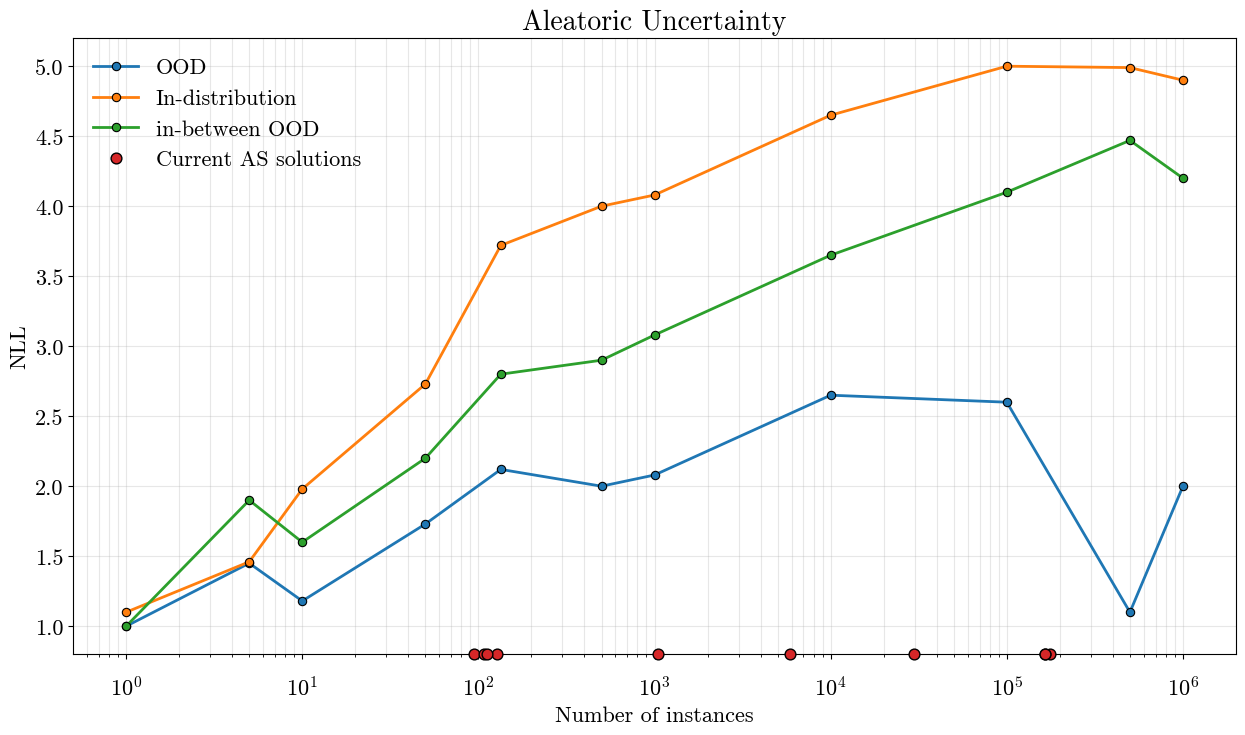

In [124]:
# Example data
x = [1, 5, 10, 50, 134, 500, 1000, 10000, 100000, 500000, 1000000]
y1 = [1.0, 1.5, 1.1, 2.0, 2.2, 1.8, 2.5, 3, 1, 2]
y2 = [1.1, 1.5, 2.1, 3.0, 4.2, 3.8, 4.5, 5, 5, 4.9]
y3 = [1.0, 2.0, 1.5, 2.5, 3, 2.8, 3.5, 4, 4.5, 4.2]

# Markers (special points in time)
#x_marks = [43, 37, 32, 110, 37, 22, 10, 817, 10, 72] # n features
x_marks = [175000, 163830, 128, 94, 163830, 29527, 108, 1044, 5839, 112] # n instances
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


plot_series_with_markers(
    ys=[y1, y2, y3],
    x=x,
    series_labels=["OOD", "In-distribution", "in-between OOD"],  # Legende für die Linien
    x_markers=x_marks,
    x_marker_labels=x_labels,
    markers_legend_label="Current AS solutions",
    title="Aleatoric Uncertainty",
    xlabel="Number of instances",
    ylabel="NLL"
)

plt.show()
